In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

In [48]:
file_name1 = dir_origen_csv + "Data_filt_horas_ceros.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["datetime"] =  pd.to_datetime(df["fecha"])#transforming "fecha" to datetime
df['dayNumber'] = df['datetime'].dt.dayofweek
df["fecha"] = df["datetime"].dt.date
df

,medidor,fecha,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth,hora,datetime,dayNumber
0,15029828,2019-04-04,1143130,114.6726,114.8017,115.2943,2.0728,0.8169,0.9463,A3,...,0.0000,medio,3,0,0,13.201916,14,9,2019-04-04 09:01:02,3
1,15029828,2019-04-04,1143509,114.6649,114.8677,114.8779,1.9875,0.3203,0.6920,A3,...,0.0000,medio,3,0,0,79.214008,14,11,2019-04-04 11:00:58,3
2,15029828,2019-04-04,1143880,114.8444,115.3403,115.6252,1.9815,0.8929,0.8766,A3,...,0.0000,medio,3,0,0,191.099708,14,13,2019-04-04 13:00:59,3
3,15029828,2019-04-04,1144272,114.6778,114.8357,114.4145,1.9633,0.9327,0.9178,A3,...,0.0000,medio,3,0,0,214.268222,14,15,2019-04-04 15:01:02,3
4,15029828,2019-04-04,1144628,116.9224,117.2767,117.0052,2.6013,0.4311,1.2383,A3,...,0.0000,medio,3,0,0,206.797500,14,17,2019-04-04 17:01:02,3
5,15029828,2019-04-04,1145053,114.1925,114.8132,115.2102,2.5062,0.4349,1.2263,A3,...,0.0000,medio,3,0,0,7.507500,14,19,2019-04-04 19:01:02,3
6,15029828,2019-04-05,1148042,116.4599,116.4413,116.5216,2.6279,0.4364,1.2431,A3,...,0.0000,medio,3,0,0,8.806263,14,9,2019-04-05 09:01:03,4
7,15029828,2019-04-05,1149035,114.3455,114.0721,113.9389,2.5562,0.4378,1.2162,A3,...,0.0000,medio,3,0,0,5.692235,14,13,2019-04-05 13:08:58,4
8,15029828,2019-04-05,1149560,117.0340,116.8882,117.2858,2.5909,0.3984,1.2069,A3,...,0.0000,medio,3,0,0,24.704658,14,15,2019-04-05 15:40:19,4
9,15029828,2019-04-05,1149951,117.3378,117.1492,117.3656,2.6382,0.4353,1.2445,A3,...,0.0000,medio,3,0,0,9.766356,14,17,2019-04-05 17:40:18,4


In [49]:
max(df.fecha)

datetime.date(2019, 6, 3)

In [50]:
min(df.fecha)

datetime.date(2019, 4, 4)

In [51]:
w1_month1_date1=datetime.date(2019,4,1)
w1_month1_date2=datetime.date(2019,4,7)

w1_month2_date1=datetime.date(2019,4,29)
w1_month2_date2=datetime.date(2019,5,5)

w1_month3_date1=datetime.date(2019,5,27)
w1_month3_date2=datetime.date(2019,6,2)

In [52]:


df['W1_L_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0) ,:]['kwh_consumido'] 
df['W1_L_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W1_L_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido'] 

df['W1_MA_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W1_MA_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido']
df['W1_MA_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W1_MI_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']
df['W1_MI_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))&(df['hora']<=18) & (df['hora']>=12) &(df['dayNumber']==2),:]['kwh_consumido']
df['W1_MI_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W1_J_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']
df['W1_J_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido']
df['W1_J_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W1_V_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W1_V_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W1_V_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido'] 

df['W1_S_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W1_S_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W1_S_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido'] 

df['W1_D_m']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']
df['W1_D_t']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido']
df['W1_D_n']= df.loc[((df['fecha']>=w1_month1_date1)& (df['fecha']<=w1_month1_date2))|((df['fecha']>=w1_month2_date1)&(df['fecha']<=w1_month2_date2))|((df['fecha']>=w1_month3_date1)&(df['fecha']<=w1_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']

In [53]:
w2_month1_date1=datetime.date(2019,4,8)
w2_month1_date2=datetime.date(2019,4,14)

w2_month2_date1=datetime.date(2019,5,6)
w2_month2_date2=datetime.date(2019,5,12)

w2_month3_date1=datetime.date(2019,6,3)
w2_month3_date2=datetime.date(2019,6,9)

In [54]:
df['W2_L_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))&(df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0) ,:]['kwh_consumido']
df['W2_L_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W2_L_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))|((df['fecha']>=w2_month3_date1)&(df['fecha']<=w2_month3_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido'] 

df['W2_MA_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W2_MA_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W2_MA_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido'] 

df['W2_MI_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W2_MI_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W2_MI_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido'] 

df['W2_J_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W2_J_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W2_J_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido'] 

df['W2_V_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W2_V_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W2_V_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido'] 

df['W2_S_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W2_S_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W2_S_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido'] 

df['W2_D_m']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W2_D_t']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W2_D_n']= df.loc[((df['fecha']>=w2_month1_date1)& (df['fecha']<=w2_month1_date2))|((df['fecha']>=w2_month2_date1)&(df['fecha']<=w2_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido'] 


In [55]:
w3_month1_date1=datetime.date(2019,4,15)
w3_month1_date2=datetime.date(2019,4,21)

w3_month2_date1=datetime.date(2019,5,13)
w3_month2_date2=datetime.date(2019,5,19)

In [56]:
df['W3_L_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0),:]['kwh_consumido']  
df['W3_L_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W3_L_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido']

df['W3_MA_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W3_MA_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W3_MA_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W3_MI_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W3_MI_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W3_MI_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W3_J_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W3_J_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W3_J_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W3_V_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W3_V_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W3_V_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido']

df['W3_S_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W3_S_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W3_S_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido']

df['W3_D_m']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W3_D_t']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W3_D_n']= df.loc[((df['fecha']>=w3_month1_date1)& (df['fecha']<=w3_month1_date2))|((df['fecha']>=w3_month2_date1)&(df['fecha']<=w3_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']


In [57]:
w4_month1_date1=datetime.date(2019,4,22)
w4_month1_date2=datetime.date(2019,4,28)

w4_month2_date1=datetime.date(2019,5,20)
w4_month2_date2=datetime.date(2019,5,26)

In [58]:
df['W4_L_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==0),:]['kwh_consumido']  
df['W4_L_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==0),:]['kwh_consumido'] 
df['W4_L_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==0),:]['kwh_consumido']

df['W4_MA_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==1),:]['kwh_consumido']  
df['W4_MA_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==1),:]['kwh_consumido'] 
df['W4_MA_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==1),:]['kwh_consumido']

df['W4_MI_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==2),:]['kwh_consumido']  
df['W4_MI_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==2),:]['kwh_consumido'] 
df['W4_MI_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==2),:]['kwh_consumido']

df['W4_J_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==3),:]['kwh_consumido']  
df['W4_J_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==3),:]['kwh_consumido'] 
df['W4_J_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==3),:]['kwh_consumido']

df['W4_V_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido']  
df['W4_V_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['W4_V_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido']

df['W4_S_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==5),:]['kwh_consumido']  
df['W4_S_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==5),:]['kwh_consumido'] 
df['W4_S_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==5),:]['kwh_consumido']

df['W4_D_m']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==6),:]['kwh_consumido']  
df['W4_D_t']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==6),:]['kwh_consumido'] 
df['W4_D_n']= df.loc[((df['fecha']>=w4_month1_date1)& (df['fecha']<=w4_month1_date2))|((df['fecha']>=w4_month2_date1)&(df['fecha']<=w4_month2_date2))& (df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==6),:]['kwh_consumido']

In [59]:
df[['W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']]

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
0,26.4075,26.4075,26.4075,26.4075,26.4075,26.4075,26.4075,26.4075,26.4075,26.4075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,158.3400,158.3400,158.3400,158.3400,158.3400,158.3400,158.3400,158.3400,158.3400,158.3400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,382.2525,382.2525,382.2525,382.2525,382.2525,382.2525,382.2525,382.2525,382.2525,382.2525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,428.7150,428.7150,428.7150,428.7150,428.7150,428.7150,428.7150,428.7150,428.7150,428.7150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,413.5950,413.5950,413.5950,413.5950,413.5950,413.5950,413.5950,413.5950,413.5950,413.5950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15.0150,15.0150,15.0150,15.0150,15.0150,15.0150,15.0150,15.0150,15.0150,15.0150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35.2275,35.2275,35.2275,35.2275,35.2275,35.2275,35.2275,35.2275,35.2275,35.2275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23.5200,23.5200,23.5200,23.5200,23.5200,23.5200,23.5200,23.5200,23.5200,23.5200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,62.3175,62.3175,62.3175,62.3175,62.3175,62.3175,62.3175,62.3175,62.3175,62.3175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19.5300,19.5300,19.5300,19.5300,19.5300,19.5300,19.5300,19.5300,19.5300,19.5300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_medidor_mes_franjas = df[['medidor','W1_L_m','W1_L_t','W1_L_n','W1_MA_m','W1_MA_t','W1_MA_n','W1_MI_m','W1_MI_t','W1_MI_n','W1_J_m','W1_J_t','W1_J_n','W1_V_m','W1_V_t','W1_V_n','W1_S_m','W1_S_t','W1_S_n','W1_D_m','W1_D_t','W1_D_n','W2_L_m','W2_L_t','W2_L_n','W2_MA_m','W2_MA_t','W2_MA_n','W2_MI_m','W2_MI_t','W2_MI_n','W2_J_m','W2_J_t','W2_J_n','W2_V_m','W2_V_t','W2_V_n','W2_S_m','W2_S_t','W2_S_n','W2_D_m','W2_D_t','W2_D_n','W3_L_m','W3_L_t','W3_L_n','W3_MA_m','W3_MA_t','W3_MA_n','W3_MI_m','W3_MI_t','W3_MI_n','W3_J_m','W3_J_t','W3_J_n','W3_V_m','W3_V_t','W3_V_n','W3_S_m','W3_S_t','W3_S_n','W3_D_m','W3_D_t','W3_D_n','W4_L_m','W4_L_t','W4_L_n','W4_MA_m','W4_MA_t','W4_MA_n','W4_MI_m','W4_MI_t','W4_MI_n','W4_J_m','W4_J_t','W4_J_n','W4_V_m','W4_V_t','W4_V_n','W4_S_m','W4_S_t','W4_S_n','W4_D_m','W4_D_t','W4_D_n']].groupby('medidor').sum()
df_medidor_mes_franjas

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_J_n,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n
medidor,,,,,,,,,,,,,,,,,,,,,
15029828,8464.942500,8858.430000,8366.032500,8533.192500,8495.445000,8383.672500,8641.762500,9521.715000,8390.235000,8693.947500,...,2877.210000,2822.505000,2848.597500,2783.812500,2789.430000,2805.390000,2778.982500,2786.280000,2817.885000,2762.235000
15029835,421.179000,424.026000,421.209000,421.158000,423.549000,421.257000,421.158000,421.260000,421.248000,423.567000,...,82.581000,80.637000,82.104000,83.163000,82.644000,88.527000,107.346000,128.946000,89.313000,80.655000
15029844,309.834000,315.450000,303.888000,309.066000,314.628000,303.888000,310.524000,315.306000,303.888000,309.612000,...,356.478000,360.738000,369.282000,356.478000,363.090000,368.556000,356.478000,362.490000,369.426000,356.478000
15029846,23223.501000,23928.108750,22537.336500,23240.259000,23860.037250,22537.336500,23161.509000,23910.579000,22537.336500,23221.878750,...,14742.992250,15069.694500,15884.205750,14395.248000,15071.269500,15875.921250,14395.248000,15066.891000,15704.876250,14395.248000
15029847,1659.960000,1682.838000,1639.590000,1690.890000,1797.552000,1639.590000,1683.582000,1750.632000,1639.590000,1686.438000,...,1251.114000,1279.764000,1293.630000,1251.114000,1270.926000,1294.782000,1251.114000,1271.946000,1295.898000,1251.114000
15029974,57.468825,57.735225,57.776250,57.048375,57.216075,55.139400,56.721900,56.787075,55.165500,55.662525,...,29.697000,30.212925,30.044625,29.666550,30.404775,31.091625,30.068175,33.328425,31.991850,29.984550
15029977,2277.276000,2269.950000,2219.643000,2279.085000,2262.726000,2222.577000,2248.176000,2326.344000,2186.274000,2242.944000,...,1433.727000,1478.211000,1469.823000,1435.176000,1483.086000,1491.999000,1438.335000,1469.097000,1468.164000,1400.178000
15842884,904.557600,954.015600,934.250700,898.047900,950.993100,922.101600,893.187900,988.682700,914.315400,919.781400,...,483.634800,444.333900,538.654500,466.124100,452.247000,483.617100,470.671800,444.333900,537.490200,461.511900
15842885,481.622100,485.201100,466.151700,481.855500,515.594700,466.151700,482.478600,508.827600,466.151700,483.575100,...,415.735500,431.022900,434.980200,415.735500,417.334800,418.907700,415.735500,417.700500,418.815900,415.735500


### CLUSTERS CONSUMO POR FRANJAS HORARIAS (0-11, 12-18, 19-23), SEMANAS (W1,W2,W3,W4) Y DIAS (L-J, V, S-D)

k: 1  cost: 140454103717.3352
k: 2  cost: 42746808966.84368
k: 3  cost: 16973950436.557865
k: 4  cost: 8385441292.997627
k: 5  cost: 4841137442.154811
k: 6  cost: 3382568002.1433935
k: 7  cost: 2520287541.040262
k: 8  cost: 1887286592.4215178
k: 9  cost: 1372644537.1418018


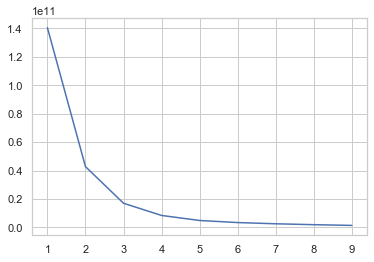

In [61]:
from sklearn.cluster import KMeans
 
A=df_medidor_mes_franjas
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')
X=df_medidor_mes_franjas.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [63]:
kmeans.cluster_centers_

array([[ 9831.7302    , 10063.48107143],
       [27463.5701    , 28192.35508333],
       [  908.67653846,   926.32362885]])

In [64]:
distance=kmeans.fit_transform(X)
distance

array([[2.71062448e+04, 1.82215716e+03, 1.09551571e+04],
       [3.87604311e+04, 1.34713610e+04, 6.99969112e+02],
       [3.89158993e+04, 1.36268344e+04, 8.55440808e+02],
       [6.01348341e+03, 1.92760843e+04, 3.20473635e+04],
       [3.69943346e+04, 1.17052555e+04, 1.06618049e+03],
       [3.92765989e+04, 1.39875350e+04, 1.21614160e+03],
       [3.61430560e+04, 1.08539811e+04, 1.91791457e+03],
       [3.80435051e+04, 1.27544805e+04, 2.79966234e+01],
       [3.86744347e+04, 1.33853640e+04, 6.13974412e+02],
       [3.73048550e+04, 1.20159753e+04, 7.58023093e+02],
       [3.85628907e+04, 1.32738275e+04, 5.02440953e+02],
       [5.64086858e+03, 1.96668764e+04, 3.24369446e+04],
       [3.93456122e+04, 1.40565494e+04, 1.28515732e+03],
       [3.93530749e+04, 1.40640122e+04, 1.29262010e+03],
       [3.81570370e+04, 1.28679937e+04, 9.76354348e+01],
       [3.82152066e+04, 1.29261425e+04, 1.54768428e+02],
       [3.93350846e+04, 1.40460215e+04, 1.27462883e+03],
       [3.93040504e+04, 1.40149

In [65]:
labels=kmeans.labels_
labels

array([1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2])

In [66]:
df_consumo_mes_franjas = df_medidor_mes_franjas
df_consumo_mes_franjas['ClustersConsumoMesFranjas'] = labels
df_consumo_mes_franjas

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029828,8464.942500,8858.430000,8366.032500,8533.192500,8495.445000,8383.672500,8641.762500,9521.715000,8390.235000,8693.947500,...,2822.505000,2848.597500,2783.812500,2789.430000,2805.390000,2778.982500,2786.280000,2817.885000,2762.235000,1
15029835,421.179000,424.026000,421.209000,421.158000,423.549000,421.257000,421.158000,421.260000,421.248000,423.567000,...,80.637000,82.104000,83.163000,82.644000,88.527000,107.346000,128.946000,89.313000,80.655000,2
15029844,309.834000,315.450000,303.888000,309.066000,314.628000,303.888000,310.524000,315.306000,303.888000,309.612000,...,360.738000,369.282000,356.478000,363.090000,368.556000,356.478000,362.490000,369.426000,356.478000,2
15029846,23223.501000,23928.108750,22537.336500,23240.259000,23860.037250,22537.336500,23161.509000,23910.579000,22537.336500,23221.878750,...,15069.694500,15884.205750,14395.248000,15071.269500,15875.921250,14395.248000,15066.891000,15704.876250,14395.248000,0
15029847,1659.960000,1682.838000,1639.590000,1690.890000,1797.552000,1639.590000,1683.582000,1750.632000,1639.590000,1686.438000,...,1279.764000,1293.630000,1251.114000,1270.926000,1294.782000,1251.114000,1271.946000,1295.898000,1251.114000,2
15029974,57.468825,57.735225,57.776250,57.048375,57.216075,55.139400,56.721900,56.787075,55.165500,55.662525,...,30.212925,30.044625,29.666550,30.404775,31.091625,30.068175,33.328425,31.991850,29.984550,2
15029977,2277.276000,2269.950000,2219.643000,2279.085000,2262.726000,2222.577000,2248.176000,2326.344000,2186.274000,2242.944000,...,1478.211000,1469.823000,1435.176000,1483.086000,1491.999000,1438.335000,1469.097000,1468.164000,1400.178000,2
15842884,904.557600,954.015600,934.250700,898.047900,950.993100,922.101600,893.187900,988.682700,914.315400,919.781400,...,444.333900,538.654500,466.124100,452.247000,483.617100,470.671800,444.333900,537.490200,461.511900,2
15842885,481.622100,485.201100,466.151700,481.855500,515.594700,466.151700,482.478600,508.827600,466.151700,483.575100,...,431.022900,434.980200,415.735500,417.334800,418.907700,415.735500,417.700500,418.815900,415.735500,2


In [70]:
grupo0 = df_consumo_mes_franjas.loc[df_consumo_mes_franjas['ClustersConsumoMesFranjas']==0,:]

In [71]:
grupo1 = df_consumo_mes_franjas.loc[df_consumo_mes_franjas['ClustersConsumoMesFranjas']==1,:]

In [72]:
grupo2 = df_consumo_mes_franjas.loc[df_consumo_mes_franjas['ClustersConsumoMesFranjas']==2,:]

In [75]:
display(grupo0, grupo1, grupo2)

,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029846,23223.5010,23928.10875,22537.3365,23240.2590,23860.03725,22537.3365,23161.5090,23910.5790,22537.3365,23221.87875,...,15069.6945,15884.20575,14395.2480,15071.2695,15875.92125,14395.2480,15066.891,15704.87625,14395.2480,0
16567733,23830.6005,23877.15750,23750.0865,23868.7785,24320.64600,23750.0865,24645.0330,25584.2685,23750.0865,24516.35550,...,13310.0730,14252.04900,12439.3185,13264.7760,14179.15800,12439.3185,12497.940,12545.25300,12439.3185,0
58706725,35336.6088,36771.79900,35162.9311,35533.3049,38912.90740,35446.9358,36531.1466,37071.7757,35399.6911,36431.28860,...,24095.3370,25164.17990,23906.9624,24087.8879,24947.41820,23906.9624,24087.955,24940.77450,23906.9624,0


,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029828,8464.9425,8858.4300,8366.0325,8533.1925,8495.4450,8383.6725,8641.7625,9521.7150,8390.2350,8693.9475,...,2822.5050,2848.5975,2783.8125,2789.4300,2805.3900,2778.9825,2786.2800,2817.8850,2762.2350,1
16951212,11612.4540,11986.6320,11597.2290,11602.8780,11828.4390,11752.6080,11658.7380,12052.5300,11420.7240,11610.3960,...,7249.7670,7739.4240,7015.6380,7188.5310,7731.2760,7015.6380,7218.7080,7558.0260,7015.6380,1
52073201,13285.8595,13005.5542,12860.6158,13127.6000,13264.3092,13158.2520,12665.6226,13426.8385,12665.6226,12939.6365,...,7024.7169,7959.1742,6872.1952,7222.7551,7358.7009,6872.1952,6945.7801,6879.0067,6896.0272,1
52073218,6817.0526,7218.0281,6714.7116,6822.7569,7123.8072,6714.7116,6820.9449,7129.9813,6714.7116,6818.9987,...,3966.2011,4273.6938,3868.8261,3978.0122,4359.2577,3868.8261,3973.3146,4333.5550,3868.8261,1
52073321,9190.0976,9261.7206,9130.2952,9474.5574,10199.5208,9130.2952,9531.3839,10218.0418,9130.2952,9490.3950,...,8459.8368,8539.4016,8343.7793,8388.4686,8491.6138,8343.7793,8386.2456,8494.5929,8343.7793,1
53307830,11369.1139,11895.9856,10988.4053,11302.1392,11928.0636,10988.4053,11326.9024,11951.2833,10988.4053,11506.8213,...,7808.4519,8105.6099,7584.7780,7780.1319,8017.4960,7584.7780,7770.9380,7994.8132,7584.7780,1
58706706,8082.5913,8218.0170,8005.2148,8131.3795,8209.8968,8004.2082,8038.2323,8140.7748,7963.3388,8075.6120,...,4617.0899,4738.9596,4578.4352,4709.7001,4800.7669,4567.2280,4669.1664,4801.6393,4584.2736,1


,W1_L_m,W1_L_t,W1_L_n,W1_MA_m,W1_MA_t,W1_MA_n,W1_MI_m,W1_MI_t,W1_MI_n,W1_J_m,...,W4_V_m,W4_V_t,W4_V_n,W4_S_m,W4_S_t,W4_S_n,W4_D_m,W4_D_t,W4_D_n,ClustersConsumoMesFranjas
medidor,,,,,,,,,,,,,,,,,,,,,
15029835,421.179000,424.026000,421.209000,421.158000,423.549000,421.257000,421.158000,421.260000,421.248000,423.567000,...,80.637000,82.104000,83.163000,82.644000,88.527000,107.346000,128.946000,89.313000,80.655000,2
15029844,309.834000,315.450000,303.888000,309.066000,314.628000,303.888000,310.524000,315.306000,303.888000,309.612000,...,360.738000,369.282000,356.478000,363.090000,368.556000,356.478000,362.490000,369.426000,356.478000,2
15029847,1659.960000,1682.838000,1639.590000,1690.890000,1797.552000,1639.590000,1683.582000,1750.632000,1639.590000,1686.438000,...,1279.764000,1293.630000,1251.114000,1270.926000,1294.782000,1251.114000,1271.946000,1295.898000,1251.114000,2
15029974,57.468825,57.735225,57.776250,57.048375,57.216075,55.139400,56.721900,56.787075,55.165500,55.662525,...,30.212925,30.044625,29.666550,30.404775,31.091625,30.068175,33.328425,31.991850,29.984550,2
15029977,2277.276000,2269.950000,2219.643000,2279.085000,2262.726000,2222.577000,2248.176000,2326.344000,2186.274000,2242.944000,...,1478.211000,1469.823000,1435.176000,1483.086000,1491.999000,1438.335000,1469.097000,1468.164000,1400.178000,2
15842884,904.557600,954.015600,934.250700,898.047900,950.993100,922.101600,893.187900,988.682700,914.315400,919.781400,...,444.333900,538.654500,466.124100,452.247000,483.617100,470.671800,444.333900,537.490200,461.511900,2
15842885,481.622100,485.201100,466.151700,481.855500,515.594700,466.151700,482.478600,508.827600,466.151700,483.575100,...,431.022900,434.980200,415.735500,417.334800,418.907700,415.735500,417.700500,418.815900,415.735500,2
15842894,1393.018500,1509.429000,1371.536400,1384.021500,1483.539600,1371.536400,1385.646300,1488.396900,1371.536400,1388.015100,...,875.069400,1004.004300,861.166500,881.734200,1017.381600,861.166500,867.424200,878.334300,861.166500,2
15842921,555.497400,568.956300,550.474200,561.363300,575.133000,546.310800,547.917300,540.629700,571.609800,552.299400,...,292.350300,306.242700,280.073400,296.969400,299.409000,280.073400,286.957800,298.316400,286.693500,2
